In [1]:
import pandas as pd

In [2]:
tar=pd.read_csv(r"C:\Users\salun\OneDrive\Desktop\imarticus\DataSetPython\NLP dataset\Trip_advisor_review.csv")


In [3]:
tar.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
tar.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [5]:
tar['Review'] = tar['Review'].str.lower()

In [6]:


import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

In [8]:
l1=list(stopwords.words('english'))
l1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def text_process(mess):            ### creating a function

    """                                                        ## a docstring
    1. remove the punctuation

    2. remove the stopwords

    3. return the list of clean textwords
    """

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = "".join(nopunc)

    

    return [ word for word in nopunc.split() if word not in l1]

In [11]:
tar['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

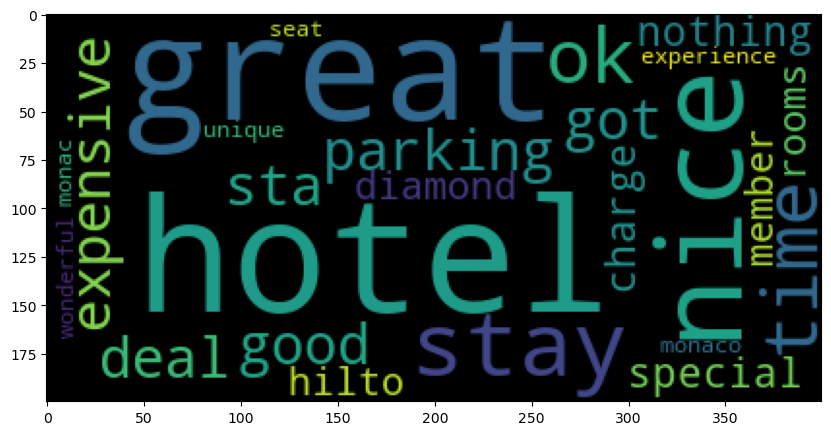

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(tar['Review']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [13]:
df1= msg[msg.Y==0] #ham
df2= msg[msg.Y==1]
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(tar['Review']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(tar['Review']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

NameError: name 'msg' is not defined

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(tar['Review']) # it just name bow,,,,, we take any name

In [16]:
messages_bow = bow_transformer.transform(tar['Review'])

In [17]:
type(messages_bow)

scipy.sparse._csr.csr_matrix

In [18]:
from sklearn.model_selection import train_test_split

ch_train_x,ch_test_x,ch_train_y,ch_test_y = train_test_split(messages_bow ,tar['Rating'],test_size=.2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ch_train_x, ch_train_y)
pred_test = rf.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ch_train_x , ch_train_y)
pred_test = dt.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ch_train_x , ch_train_y)
pred_test = logreg.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(ch_train_x , ch_train_y)
pred_nb = nb.predict(ch_test_x)
tab_nb = confusion_matrix(ch_test_y , pred_test)
print(tab_nb)
print(classification_report(ch_test_y,pred_test))

In [ ]:
# # human Emotions are where,  there randomness is also high

# 1,2 == +ve
# 3 == neutral
# 4,5 == -ve

# 1----1
# 2----1
# 3----2
# 4----3
# 5----3

In [ ]:
tar=pd.read_csv(r"C:\Users\salun\OneDrive\Desktop\imarticus\DataSetPython\NLP dataset\Trip_advisor_review.csv")


In [ ]:
tar.head()

In [ ]:
tar.Rating.replace({4:2, 2:1, 3:2, 5:2, 1:1},inplace = True)

In [ ]:
tar.head()

In [ ]:
tar['Review'] = tar['Review'].str.lower()

In [ ]:
def text_process(mess):            ### creating a function

    """                                                        ## a docstring
    1. remove the punctuation

    2. remove the stopwords

    3. return the list of clean textwords
    """

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = "".join(nopunc)

    

    return [ word for word in nopunc.split() if word not in l1]

In [ ]:
tar['Review'].apply(text_process)

In [ ]:
df1= tar[tar.Rating==1] #ham
df2= tar[tar.Rating==2]
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(df1['Review']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(df2['Review']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [ ]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(tar['Review']) # it just name bow,,,,, we take any name

In [ ]:
messages_bow = bow_transformer.transform(tar['Review'])

In [ ]:
from sklearn.model_selection import train_test_split

ch_train_x,ch_test_x,ch_train_y,ch_test_y = train_test_split(messages_bow ,tar['Rating'],test_size=.2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ch_train_x, ch_train_y)
pred_test = rf.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ch_train_x , ch_train_y)
pred_test = dt.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ch_train_x , ch_train_y)
pred_test = logreg.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(ch_train_x , ch_train_y)
pred_nb = nb.predict(ch_test_x)
tab_nb = confusion_matrix(ch_test_y , pred_nb)
print(tab_nb)
print(classification_report(ch_test_y,pred_nb))

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(msg['X']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)